In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [146]:
train_df=pd.read_csv("data/train.csv")
train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [147]:
test_df=pd.read_csv("data/test.csv")
test_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [148]:
merged_df=pd.concat([train_df,test_df],ignore_index=True)

In [149]:
merged_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [150]:
merged_df.shape

(783667, 12)

In [151]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [152]:
merged_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [153]:
merged_df.drop(['User_ID'],axis=1,inplace=True)

In [154]:
merged_df.head(3)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0


In [155]:
merged_df['Gender']=merged_df['Gender'].map({'F':0,'M':1})
merged_df.head(3)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0


In [156]:
merged_df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [157]:
#pd.get_dummies(merged_df['Age'],drop_first=True)
merged_df['Age']=merged_df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'45-50':5,'51-55':6,'55+':7})
merged_df.head()


,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1.0,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1.0,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1.0,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1.0,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7.0,16,C,4+,0,8,NaN,NaN,7969.0


In [158]:
df_city=pd.get_dummies(merged_df['City_Category'],drop_first=True)


In [159]:
df=pd.concat([merged_df,df_city],axis=1)

In [160]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1.0,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1.0,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1.0,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1.0,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7.0,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [161]:
df.drop('City_Category',axis=1,inplace=True)
df.head(3)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1.0,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1.0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1.0,10,2,0,12,NaN,NaN,1422.0,0,0


In [162]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                            65278
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [163]:
age_median=df['Age'].median()

In [164]:
df[df['Age'].isnull()]

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
6,P00184942,1,NaN,7,2,1,1,8.0,17.0,19215.0,1,0
7,P00346142,1,NaN,7,2,1,1,15.0,NaN,15854.0,1,0
8,P0097242,1,NaN,7,2,1,1,16.0,NaN,15686.0,1,0
52,P00129542,1,NaN,1,3,1,8,14.0,NaN,5839.0,0,1
53,P00140742,1,NaN,1,3,1,1,15.0,NaN,15912.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
783647,P00014842,1,NaN,1,1,1,1,2.0,5.0,NaN,1,0
783648,P00109542,1,NaN,1,1,1,8,14.0,17.0,NaN,1,0
783658,P00252442,1,NaN,7,3,0,8,NaN,NaN,NaN,0,0
783665,P00124742,0,NaN,1,4+,0,10,16.0,NaN,NaN,0,1


In [165]:
df['Age'].fillna(age_median,inplace=True)

In [166]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [167]:
mode_P2_cat=df['Product_Category_2'].mode()[0]
mode_P3_cat=df['Product_Category_3'].mode()[0]

In [168]:
df['Product_Category_2'].fillna(mode_P2_cat,inplace=True)
df['Product_Category_3'].fillna(mode_P3_cat,inplace=True)

In [169]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [170]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [171]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace("+","")

In [172]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [173]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [174]:
df.dtypes

Product_ID                     object
Gender                          int64
Age                           float64
Occupation                      int64
Stay_In_Current_City_Years      int32
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
B                               uint8
C                               uint8
dtype: object

In [175]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

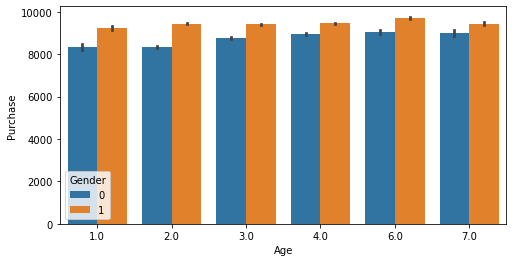

In [176]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(8,4)
sns.barplot('Age','Purchase',hue='Gender',data=df)

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

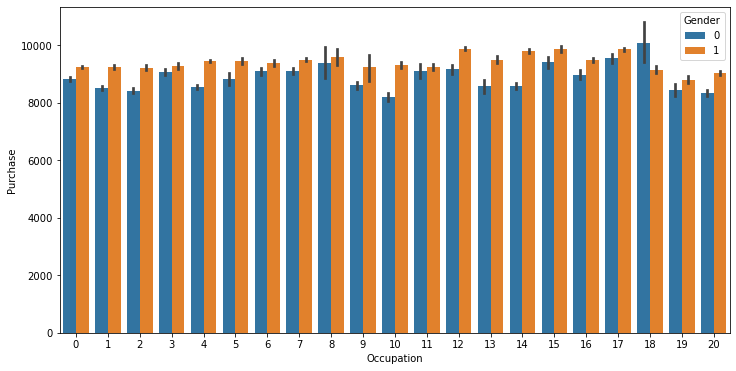

In [177]:
matplotlib.rcParams['figure.figsize']=(12,6)
sns.barplot('Occupation','Purchase',hue='Gender',data=df)

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

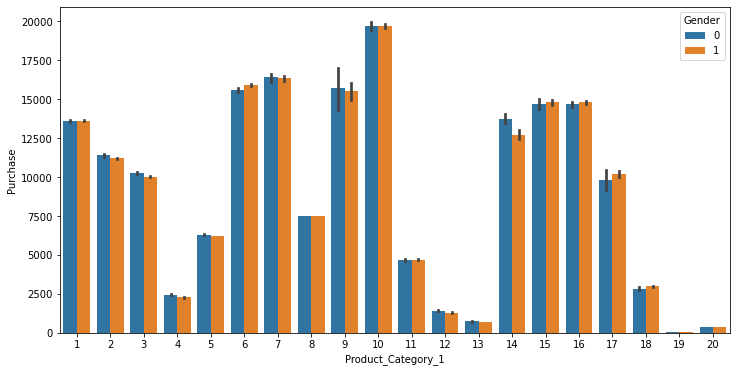

In [178]:
matplotlib.rcParams['figure.figsize']=(12,6)
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df)

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

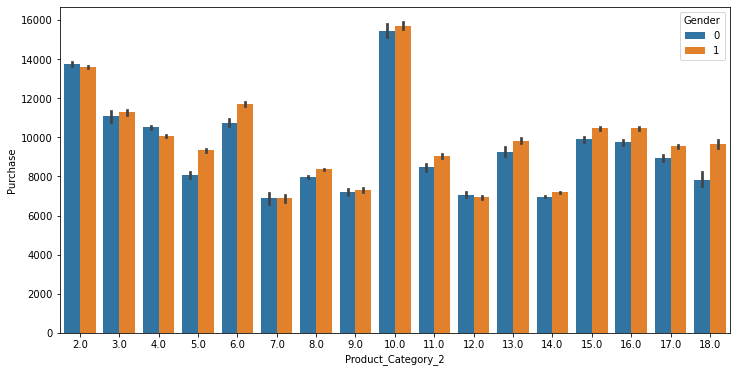

In [179]:
matplotlib.rcParams['figure.figsize']=(12,6)
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=df)

<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

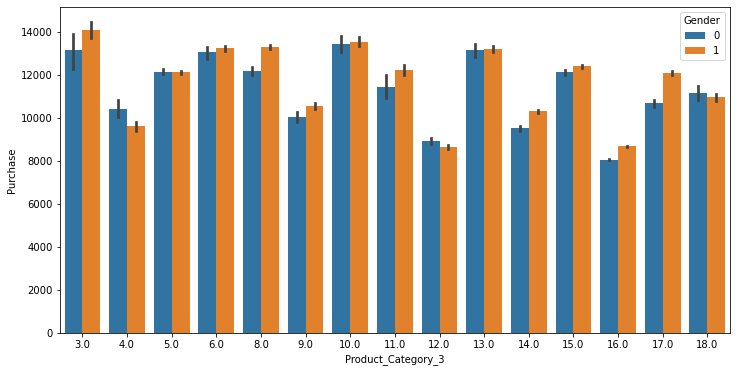

In [180]:
matplotlib.rcParams['figure.figsize']=(12,6)
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=df)

<AxesSubplot:xlabel='Product_Category_3', ylabel='count'>

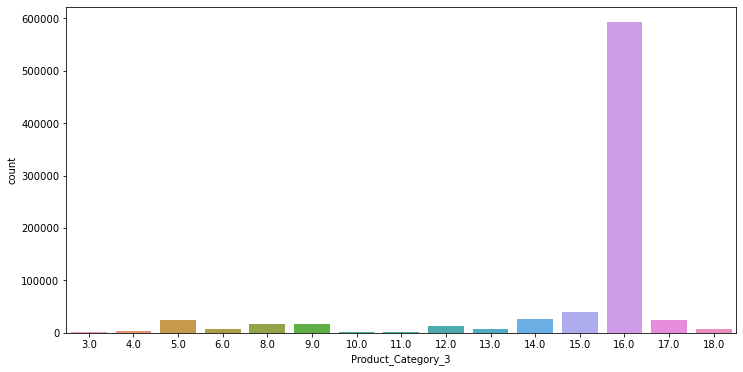

In [181]:
matplotlib.rcParams['figure.figsize']=(12,6)
sns.countplot('Product_Category_3',data=df)

<AxesSubplot:xlabel='Age', ylabel='count'>

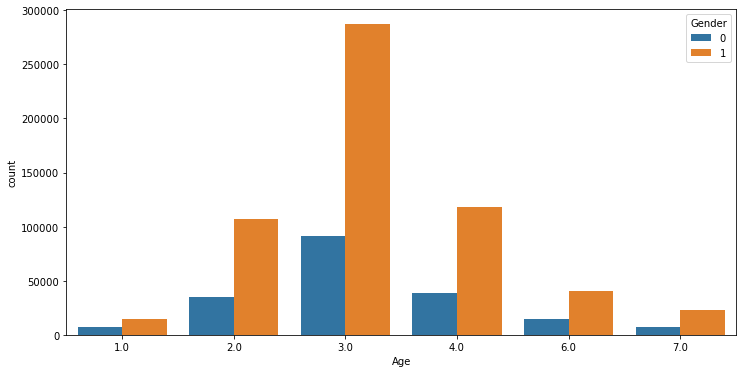

In [182]:
matplotlib.rcParams['figure.figsize']=(12,6)
sns.countplot('Age',hue='Gender',data=df)

In [183]:
df_test=df[df['Purchase'].isnull()]
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [184]:
df_train=df[~df['Purchase'].isnull()]

In [185]:
df_train.isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
B                             0
C                             0
dtype: int64

In [186]:
df_train.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1.0,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1.0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1.0,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1.0,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7.0,16,4,0,8,8.0,16.0,7969.0,0,1


In [187]:
df_train.drop('Product_ID',axis=1,inplace=True)

In [188]:
df_train.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1.0,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1.0,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1.0,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1.0,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7.0,16,4,0,8,8.0,16.0,7969.0,0,1


In [189]:
X=df_train.drop('Purchase',axis=1)

In [190]:
X.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,0,1.0,10,2,0,3,8.0,16.0,0,0
1,0,1.0,10,2,0,1,6.0,14.0,0,0
2,0,1.0,10,2,0,12,8.0,16.0,0,0
3,0,1.0,10,2,0,12,14.0,16.0,0,0
4,1,7.0,16,4,0,8,8.0,16.0,0,1


In [191]:
X.shape

(550068, 10)

In [192]:
y=df_train['Purchase']

In [193]:
y.shape

(550068,)

In [194]:
y.head(3)

0     8370.0
1    15200.0
2     1422.0
Name: Purchase, dtype: float64

In [195]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [196]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [197]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [198]:
model.fit(X_train,y_train)

LinearRegression()

In [199]:
model.score(X_test,y_test)

0.13230589322246922

In [201]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [202]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [203]:
rf.score(X_test,y_test)

0.6336470252663284